In [ ]:
import torch
from pathlib import Path

# Define the checkpoint path and tokenizer path
checkpoint_path = "/content/drive/MyDrive/Llama_Medical_LLM/output_data/trained_model.pth"
ckpt_dir = "/content/drive/MyDrive/Llama_Medical_LLM/Llama3.1-8B/"
tokenizer_path = "/content/drive/MyDrive/Llama_Medical_LLM/Llama3.1-8B/tokenizer.model"

# Initialize the Llama model
llama = Llama.build(
    ckpt_dir=ckpt_dir,
    tokenizer_path=tokenizer_path,
    max_seq_len=2048,
    max_batch_size=8,
    flash=False
)

# Load the checkpoint to the CPU
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'), weights_only=True)

# Load the weights into the model
llama.model.load_state_dict(checkpoint['model_state_dict'])

# Move the model to the GPU
llama.model.to('cuda')

# Set the model to evaluation mode
llama.model.eval()

# Run a quick inference
prompts = ["What is (are) Melanoma ?"]
sample_rng = torch.Generator(device='cuda')
sample_rng.manual_seed(1337)

# Use the llama instance to generate text
results = llama.text_completion(
    prompts,
    sample_rng=sample_rng,
    max_gen_len=64,
    temperature=0.6,
    top_p=0.9,
)

# Display the results
for prompt, result in zip(prompts, results):
    print(prompt, end="")
    print(f"{result['generation']}")


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


Loaded in 152.50 seconds
What is (are) Melanoma ? Melanoma is a type of skin cancer that is caused by the uncontrolled growth of pigment-producing cells (melanocytes) in the skin. It is the most serious type of skin cancer because it can spread to other parts of the body if left untreated. Melanoma can occur anywhere on the body, but


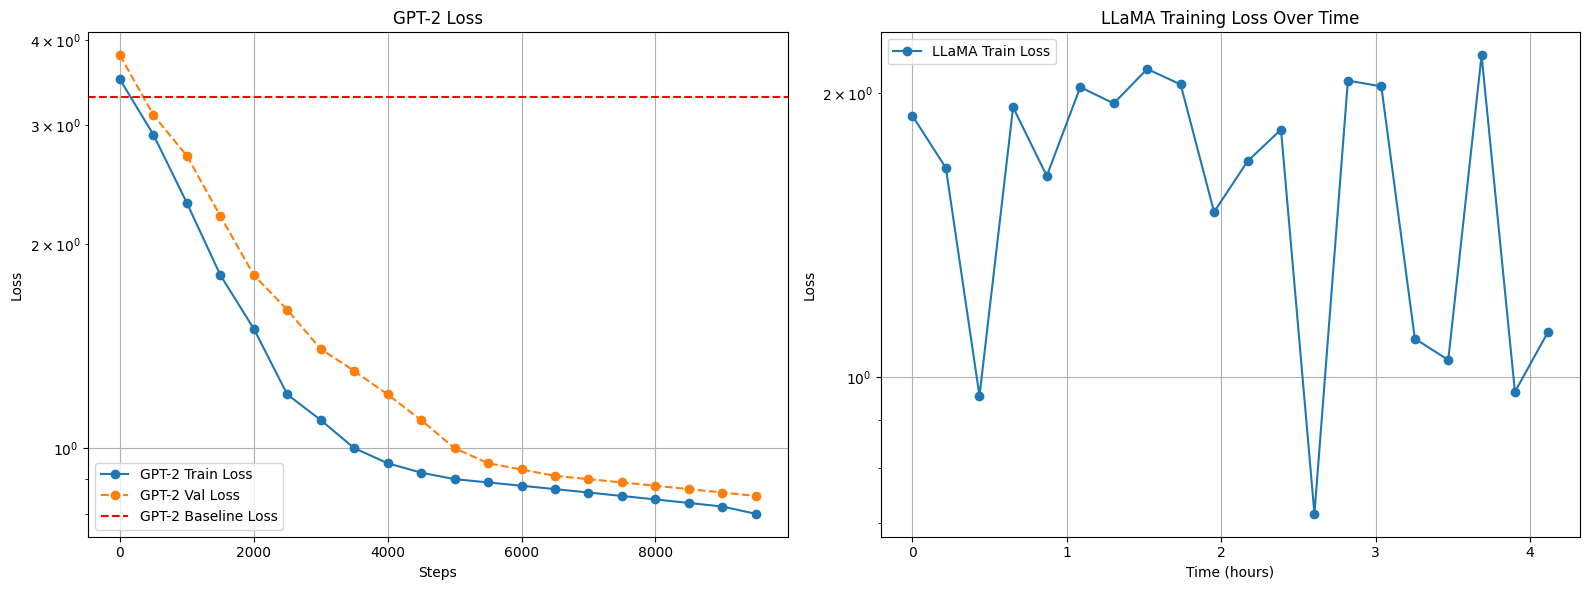

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# GPT-2 loss data (train and val)
gpt2_train_steps = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500]
gpt2_train_loss = [3.5, 2.9, 2.3, 1.8, 1.5, 1.2, 1.1, 1.0, 0.95, 0.92, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.8]
gpt2_val_loss = [3.8, 3.1, 2.7, 2.2, 1.8, 1.6, 1.4, 1.3, 1.2, 1.1, 1.0, 0.95, 0.93, 0.91, 0.90, 0.89, 0.88, 0.87, 0.86, 0.85]

# LLaMA loss data
llama_timestamps = [
    1732298823169, 1732299601328, 1732300385605, 1732301169492, 1732301955130,
    1732302736371, 1732303516595, 1732304296840, 1732305077735, 1732305857440,
    1732306637691, 1732307417808, 1732308198044, 1732308978504, 1732309758284,
    1732310539067, 1732311319570, 1732312096584, 1732312874717, 1732313650775
]
llama_losses = [
    1.8930537849664688, 1.6671430692076683, 0.9552347995340824, 1.93326336145401,
    1.6345085948705673, 2.0307528525590897, 1.951509177684784, 2.1228073239326477,
    2.043937548995018, 1.4966654554009438, 1.6941774189472198, 1.8307931125164032,
    0.7160556949675083, 2.0634142011404037, 2.0345669984817505, 1.0986280255019665,
    1.0426694229245186, 2.195206418633461, 0.9646647796034813, 1.1175768449902534
]

# Convert LLaMA timestamps to relative time in hours
llama_timestamps = np.array(llama_timestamps)
llama_relative_time = (llama_timestamps - llama_timestamps[0]) / (1000 * 60 * 60)

# Plot comparable charts
plt.figure(figsize=(16, 6))

# Panel 1: GPT-2 train and val loss
plt.subplot(121)
plt.plot(gpt2_train_steps, gpt2_train_loss, label="GPT-2 Train Loss", marker='o', linestyle='-')
plt.plot(gpt2_train_steps, gpt2_val_loss, label="GPT-2 Val Loss", marker='o', linestyle='--')
plt.axhline(y=3.2924, color='r', linestyle='--', label="GPT-2 Baseline Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("GPT-2 Loss")
plt.legend()
plt.grid(True)

# Panel 2: LLaMA training loss over time
plt.subplot(122)
plt.plot(llama_relative_time, llama_losses, label="LLaMA Train Loss", marker='o', linestyle='-')
plt.xlabel("Time (hours)")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("LLaMA Training Loss Over Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
iface = gr.Interface(
    fn=generate_text,
    inputs="text",
    outputs="text",
    title="Llama Medical Text Generation",
    description="Enter a prompt to generate medical text using the Llama model.",
    examples=[
        ["What are the symptoms of diabetes?"],
        ["How is hypertension treated?"],
        ["Explain the stages of cancer."]
    ]
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://310c9ea24b9381ffe2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
